In [2]:
# import libraries
"""
Numpy and Pandas for data manipulation
Matplotlib and Seaborn for visualization
Scikit-learn for simple machine learning
"""
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/wangxinjie/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# use a standard dataset of heterogenous data
data = pd.read_csv('Crimes_-_2001_to_present.csv')

# 1 Data Preprocessing
Start by loading and wrangling your dataset. 
That includes dealing with missing values and formatting your dataset for later use.

In [4]:
crimes = data[(data.Year>2009)&(data.Year<2016)] # 2010~2015
crimes.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
4784,10365064,HZ100370,12/31/2015 11:59:00 PM,075XX S EMERALD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,17,68,14,1172605,1854931,2015,01/07/2016 04:14:34 PM,41.757367,-87.642993,"(41.757366519, -87.642992854)"
4785,10364662,HZ100006,12/31/2015 11:55:00 PM,079XX S STONY ISLAND AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,8,45,04B,1188223,1852840,2015,01/07/2016 04:14:34 PM,41.751270,-87.585822,"(41.751270452, -87.585822373)"
4786,10364740,HZ100010,12/31/2015 11:50:00 PM,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,50,2,06,1158878,1949369,2015,01/07/2016 04:14:34 PM,42.016804,-87.690709,"(42.016804165, -87.690708662)"
4787,10364683,HZ100002,12/31/2015 11:50:00 PM,037XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,44,6,08B,1167786,1925033,2015,01/07/2016 04:14:34 PM,41.949837,-87.658635,"(41.949837364, -87.658635101)"
4788,10366580,HZ102701,12/31/2015 11:45:00 PM,050XX W CONCORD PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,37,25,14,1142595,1910502,2015,01/07/2016 04:14:34 PM,41.910470,-87.751597,"(41.910469677, -87.751597381)"


In [5]:
# list all columns
crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

Rename columns

In [6]:
crimes.columns = ['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type',
       'Description', 'Location_Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate',
       'Y_Coordinate', 'Year', 'Updated_On', 'Latitude', 'Longitude',
       'Location'] # Rename columes

In [7]:
crimes.describe()

,ID,Arrest,Domestic,Beat,District,Ward,Community_Area,X_Coordinate,Y_Coordinate,Year,Latitude,Longitude
count,1895813.000000,1895813,1895813,1895813.000000,1895810.000000,1895767.000000,1895343.000000,1881295.000000,1881295.000000,1895813.000000,1881295.000000,1881295.000000
mean,8792771.353890,0.273229,0.145767,1172.504604,11.301682,22.779014,37.716313,1164443.371174,1885384.286086,2012.284076,41.841094,-87.672090
std,939134.457411,0.445618,0.352873,698.000627,6.923977,13.751647,21.520032,16376.273112,31433.906200,1.688949,0.086454,0.059598
min,19237.000000,False,False,111.000000,1.000000,1.000000,0.000000,1092711.000000,1813897.000000,2010.000000,41.644590,-87.934325
25%,8044629.000000,0,0,621.000000,6.000000,10.000000,23.000000,1152602.000000,1858633.000000,2011.000000,41.767449,-87.715079
50%,8785690.000000,0,0,1031.000000,10.000000,22.000000,32.000000,1165876.000000,1890528.000000,2012.000000,41.855289,-87.666558
75%,9560566.000000,1,0,1722.000000,17.000000,34.000000,58.000000,1176352.000000,1908999.000000,2014.000000,41.906068,-87.628344
max,10380297.000000,True,True,2535.000000,31.000000,50.000000,77.000000,1205111.000000,1951601.000000,2015.000000,42.022787,-87.524615


## 1-1 Assign a primary key

In [8]:
# we want to use the ID as the "primary key" of a row
crimes.index = crimes.pop('ID')

## 1-2 Dealing with missing data

In [9]:
crimes.isnull().sum()

Case_Number                 1
Date                        0
Block                       0
IUCR                        0
Primary_Type                0
Description                 0
Location_Description      921
Arrest                      0
Domestic                    0
Beat                        0
District                    3
Ward                       46
Community_Area            470
FBI_Code                    0
X_Coordinate            14518
Y_Coordinate            14518
Year                        0
Updated_On                  2
Latitude                14518
Longitude               14518
Location                14518
dtype: int64

The rate of missing data,
Which is only 0.7%

In [10]:
print (470/1895578) # Ward
print (14515/1895578) # Coordinate, Location, etc.

0.0002479454815365023
0.007657295030856024


### 1-2-1 drop the rows with na values

In [11]:
print(crimes.shape)

(1895813, 21)


In [12]:
#drop rows with na values
crimes = crimes.dropna()
print(crimes.shape)

(1879946, 21)


In [13]:
crimes.isnull().sum()

Case_Number             0
Date                    0
Block                   0
IUCR                    0
Primary_Type            0
Description             0
Location_Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community_Area          0
FBI_Code                0
X_Coordinate            0
Y_Coordinate            0
Year                    0
Updated_On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

## 1-3 Formatting data
### 1-3-1 Convert data type from object to datetime

In [14]:
convert_datetime = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')

In [15]:
year = convert_datetime.dt.year
month = convert_datetime.dt.month
day = convert_datetime.dt.day
weekday =  convert_datetime.dt.weekday
hour = convert_datetime.dt.hour
time = convert_datetime.dt.time

#### Join datetime data

In [16]:
frames_YMDWT = [year, month, day, weekday, hour, time]
join_YMDWT = pd.concat(frames_YMDWT, axis=1, join='inner')
join_YMDWT.columns = ['year','month','day','weekday','hour','time'] # Rename columes
New_Crimes = pd.concat([crimes,join_YMDWT], axis=1, join='inner') # Join the new time-formated data with old data
New_Crimes.drop('Date',inplace=True,axis=1) # Drop original date of the old data, since we won't use it anymore.

In [17]:
New_Crimes # Display result

,Case_Number,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,...,Updated_On,Latitude,Longitude,Location,year,month,day,weekday,hour,time
ID,,,,,,,,,,,,,,,,,,,,,
10365064,HZ100370,075XX S EMERALD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,621,6,...,01/07/2016 04:14:34 PM,41.757367,-87.642993,"(41.757366519, -87.642992854)",2015,12,31,3,23,23:59:00
10364662,HZ100006,079XX S STONY ISLAND AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,411,4,...,01/07/2016 04:14:34 PM,41.751270,-87.585822,"(41.751270452, -87.585822373)",2015,12,31,3,23,23:55:00
10364740,HZ100010,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,2411,24,...,01/07/2016 04:14:34 PM,42.016804,-87.690709,"(42.016804165, -87.690708662)",2015,12,31,3,23,23:50:00
10364683,HZ100002,037XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,1923,19,...,01/07/2016 04:14:34 PM,41.949837,-87.658635,"(41.949837364, -87.658635101)",2015,12,31,3,23,23:50:00
10366580,HZ102701,050XX W CONCORD PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2533,25,...,01/07/2016 04:14:34 PM,41.910470,-87.751597,"(41.910469677, -87.751597381)",2015,12,31,3,23,23:45:00
10365005,HZ100487,001XX E WACKER DR,0820,THEFT,$500 AND UNDER,STREET,False,False,114,1,...,01/07/2016 04:14:34 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)",2015,12,31,3,23,23:45:00
10365142,HZ100722,001XX E WACKER DR,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,114,1,...,01/07/2016 04:14:34 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)",2015,12,31,3,23,23:45:00
10364809,HZ100034,004XX E RANDOLPH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,False,True,114,1,...,01/07/2016 04:14:34 PM,41.884547,-87.616947,"(41.884546689, -87.616947314)",2015,12,31,3,23,23:42:00
10364668,HY556628,048XX S JUSTINE ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,True,True,933,9,...,01/07/2016 04:14:34 PM,41.805879,-87.663680,"(41.805879049, -87.663679798)",2015,12,31,3,23,23:41:00


# 2 Descriptive statistics

## 2-1 Datetime
### 2-1-1 Count case frequency of datetime

In [18]:
count_year = New_Crimes.groupby('year').agg({ 'Case_Number': 'count'})
count_month = New_Crimes.groupby('month').agg({ 'Case_Number': 'count'})
count_weekday = New_Crimes.groupby('weekday').agg({ 'Case_Number': 'count'})
count_hour = New_Crimes.groupby('hour').agg({ 'Case_Number': 'count'})

The cases is decreasing year by year 

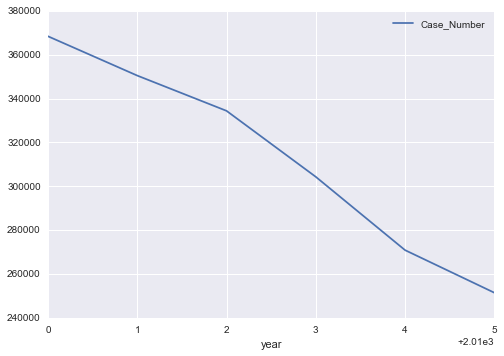

In [19]:
count_year.plot()

Most of the cases are happened in summer

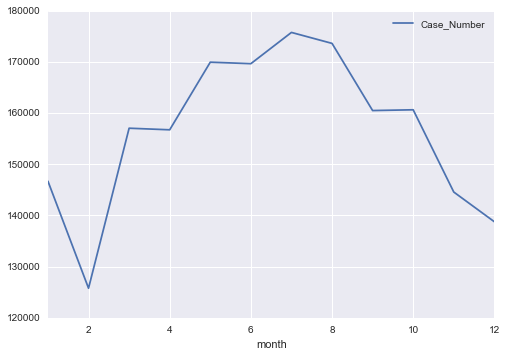

In [20]:
count_month.plot()

Most of the cases are happened on Thursday

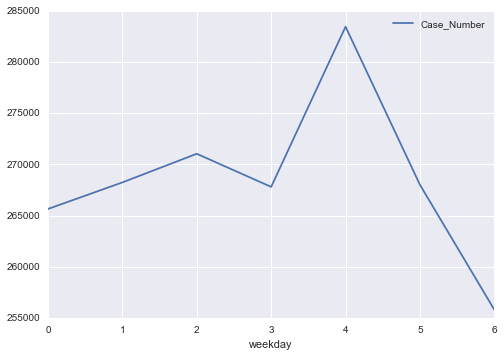

In [21]:
count_weekday.plot()

Most of the cases are happened during the noon or the night

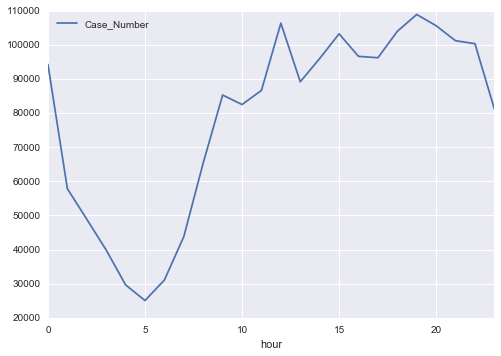

In [22]:
count_hour.plot()

### 2-1-2 Count "Primary Type" of datetime

#### Find main Primary Types

In [23]:
grouped = New_Crimes.groupby('Primary_Type') # Group by Primary types
CountPrimaryType = grouped.agg({'Case_Number': 'count'}) 
PrimaryTypeRate = []
for row in CountPrimaryType['Case_Number']:
    PrimaryTypeRate.append(row/1879946) # Calculate rates
CountPrimaryType['Rate'] = PrimaryTypeRate # Put rates into frame 'CountPrimaryType'
CountPrimaryType.sort_values('Case_Number', ascending = False)

,Case_Number,Rate
Primary_Type,,
THEFT,413543,0.219976
BATTERY,335153,0.178278
NARCOTICS,201309,0.107082
CRIMINAL DAMAGE,200034,0.106404
BURGLARY,120647,0.064176
ASSAULT,113065,0.060143
OTHER OFFENSE,111005,0.059047
MOTOR VEHICLE THEFT,87080,0.046320
DECEPTIVE PRACTICE,76831,0.040869


In [24]:
count_type = New_Crimes.groupby('Primary_Type').agg({ 'Case_Number': 'count'})
count_type = count_type.sort_values('Case_Number', ascending=False)
count_type.columns = ['Case_count'] # Rename columes

In [25]:
count_type[:10]

,Case_count
Primary_Type,
THEFT,413543
BATTERY,335153
NARCOTICS,201309
CRIMINAL DAMAGE,200034
BURGLARY,120647
ASSAULT,113065
OTHER OFFENSE,111005
MOTOR VEHICLE THEFT,87080
DECEPTIVE PRACTICE,76831


Then we take a look at top primary types of years.
Most of the cases are theft and followed by battery, narcotics, criminal damage and burglary.
However, by 2015, narcotics almost extincts.


In [26]:
top5_type = New_Crimes[New_Crimes.Primary_Type.isin(['THEFT','BATTERY','NARCOTICS','CRIMINAL DAMAGE','BURGLARY'])]

# top5_type_year = top4_type.groupby(['year','Primary_Type']).agg({ 'Case_Number': 'count'})
# top5_type_month = top4_type.groupby(['month','Primary_Type']).agg({ 'Case_Number': 'count'})
# top5_type_weekday = top4_type.groupby(['weekday','Primary_Type']).agg({ 'Case_Number': 'count'})
# top5_type_hour = top4_type.groupby(['hour','Primary_Type']).agg({ 'Case_Number': 'count'})

/Users/wangxinjie/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


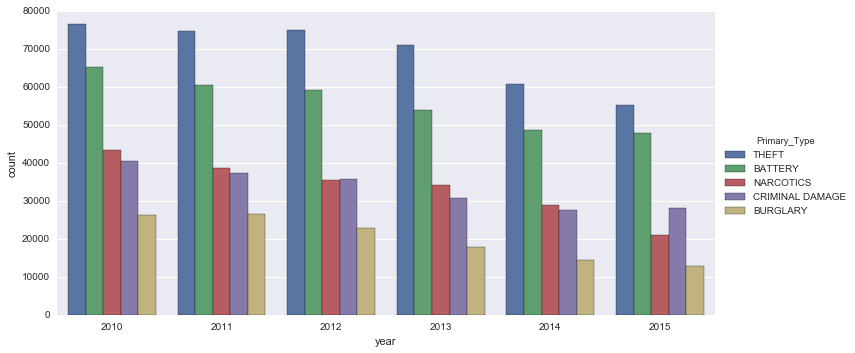

In [27]:
sns.factorplot("year", data=top5_type, hue="Primary_Type",size=5,aspect=2, 
               kind='count', order=range(2010, 2016), hue_order=['THEFT','BATTERY','NARCOTICS','CRIMINAL DAMAGE','BURGLARY'])

/Users/wangxinjie/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


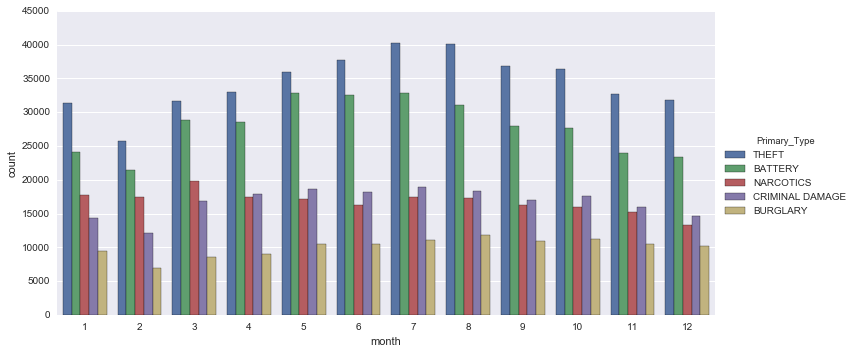

In [28]:
sns.factorplot("month", data=top5_type, hue="Primary_Type",size=5,aspect=2, 
               kind='count', order=range(1, 13), hue_order=['THEFT','BATTERY','NARCOTICS','CRIMINAL DAMAGE','BURGLARY'])

/Users/wangxinjie/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


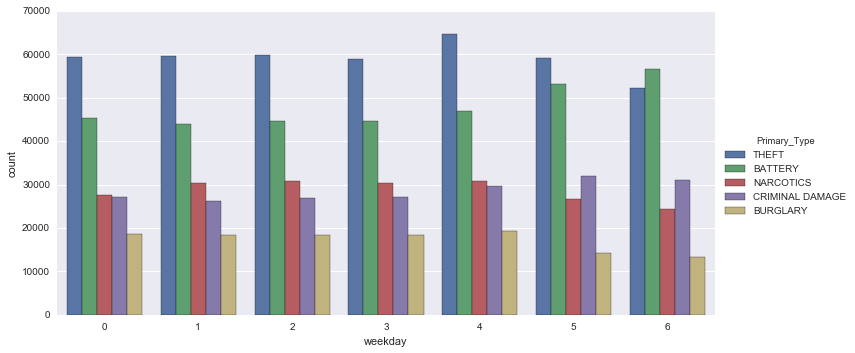

In [29]:
sns.factorplot("weekday", data=top5_type, hue="Primary_Type",size=5,aspect=2, 
               kind='count', order=range(0,7), hue_order=['THEFT','BATTERY','NARCOTICS','CRIMINAL DAMAGE','BURGLARY'])

## 2-2 Deepening to each community area
### Overview

Cases happened in wards by hours. We found out that ward at 19 is the most dangerous zone of Chicago.

In [30]:
WardGroupedHR = New_Crimes.groupby(['Ward', 'hour'])
WcountCaseByHR = WardGroupedHR.agg({ 'Case_Number': 'count'}).sort_values('Case_Number', ascending = False)
WcountCaseByHR.head(20)

Case_Number
Ward hour             
28   19           6198
42   17           5513
28   20           5458
     11           5257
     12           5255
     18           5191
42   16           5154
     14           5151
     18           5081
     15           5030
     12           5014
24   19           4898
42   13           4882
28   21           4873
     22           4824
2    12           4782
28   15           4770
42   19           4700
28   16           4628
     10           4614

We also group wards and primary types.

In [31]:
WardGrouped = New_Crimes.groupby(['Ward', 'Primary_Type'])
WcountCaseByPT = WardGrouped.agg({ 'Case_Number': 'count'})
WcountCaseByPT

Case_Number
Ward Primary_Type                                  
1    ARSON                                       52
     ASSAULT                                   1483
     BATTERY                                   4460
     BURGLARY                                  2783
     CRIM SEXUAL ASSAULT                        102
     CRIMINAL DAMAGE                           4100
     CRIMINAL TRESPASS                          699
     DECEPTIVE PRACTICE                        1545
     GAMBLING                                     5
     HOMICIDE                                    20
     INTERFERENCE WITH PUBLIC OFFICER            47
     INTIMIDATION                                11
     KIDNAPPING                                  13
     LIQUOR LAW VIOLATION                       120
     MOTOR VEHICLE THEFT                       1985
     NARCOTICS                                 1146
     NON - CRIMINAL                               1
     NON-CRIMINAL                                 1
     OBSCENITY                                    2
     OFFENSE INVOLVING CHILDREN                 116
     OTHER NARCOTIC VIOLATION                     1
     OTHER OFFENSE                             1246
     PROSTITUTION                                61
     PUBLIC PEACE VIOLATION                     145
     ROBBERY                                   1275
     SEX OFFENSE                                118
     STALKING                                    24
     THEFT                                    12629
     WEAPONS VIOLATION                          131
2    ARSON                                       41
...                                             ...
49   THEFT                                     5498
     WEAPONS VIOLATION                          274
50   ARSON                                       24
     ASSAULT                                   1009
     BATTERY                                   3057
     BURGLARY                                  1710
     CONCEALED CARRY LICENSE VIOLATION            1
     CRIM SEXUAL ASSAULT                         73
     CRIMINAL DAMAGE                           2727
     CRIMINAL TRESPASS                          404
     DECEPTIVE PRACTICE                         825
     GAMBLING                                     4
     HOMICIDE                                    13
     INTERFERENCE WITH PUBLIC OFFICER            68
     INTIMIDATION                                 8
     KIDNAPPING                                  10
     LIQUOR LAW VIOLATION                        37
     MOTOR VEHICLE THEFT                        864
     NARCOTICS                                 1062
     OBSCENITY                                    5
     OFFENSE INVOLVING CHILDREN                 149
     OTHER OFFENSE                             1239
     PROSTITUTION                                28
     PUBLIC INDECENCY                             1
     PUBLIC PEACE VIOLATION                     118
     ROBBERY                                    665
     SEX OFFENSE                                 60
     STALKING                                    11
     THEFT                                     4826
     WEAPONS VIOLATION                          131

[1425 rows x 1 columns]

### 2-2-1 Group Community Areas and save dataframes into lists

In [32]:
WardGrouped = New_Crimes.groupby(['Ward'])
groupListPT = []
groupListHR = []
for i in range(0,50):
    groupListPT.append(WardGrouped.get_group(i+1)) # append sub dataframe into list
    # group the sub dataframe by Primary type
    groupListPT[i] = groupListPT[i].groupby(['Primary_Type']).agg({'Case_Number':'count'})
    groupListPT[i] = groupListPT[i].sort_values('Case_Number', ascending = False) #sort
    
    groupListHR.append(WardGrouped.get_group(i+1)) # append sub dataframe into list
    # group the sub dataframe by hour
    groupListHR[i] = groupListHR[i].groupby(['hour']).agg({'Case_Number':'count'})

### 2-2-2 Interactive search
By Primary Type of a ward

In [33]:
from IPython.html.widgets import interact, interact_manual

@interact_manual(text='1')
def react(text):
    groupListPT[int(text)-1].plot(kind = 'bar',title='Ward'+text) #create a bar chart

/Users/wangxinjie/anaconda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


By hours of a ward

In [34]:
@interact_manual(text='1')
def react(text):
    groupListHR[int(text)-1].plot(title='Ward'+text) #create a plot

By hours of wards, we can observe that some wards are really dangerous comparing to other wards at certain hour.

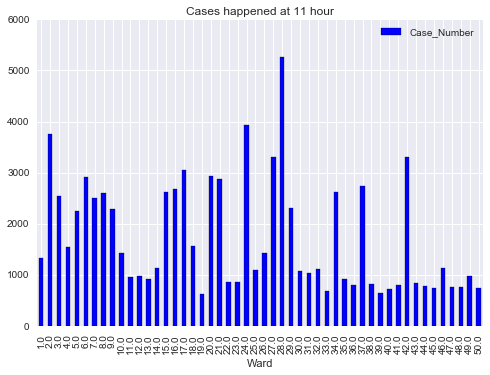

In [35]:
#WardGrouped.agg({'Case_Number':'count'})
@interact(slider=(0,23))
def react(slider):
    WardGroupedHR = New_Crimes.loc[New_Crimes['hour'] == slider]
    WardGroupedHR = WardGroupedHR.groupby(['Ward'])
    WardGroupedHR.agg({'Case_Number':'count'}).plot(kind = 'bar', title = 'Cases happened at '+str(slider)+' hour') #create a plot

## 2-3 **Others Plotting for primary type **

Here, we try to find the arrtest frency with each primary type.

** 2-3-1 **
Simplify the data 

In [36]:
#print out all the arrest number with primary type, and sort it.
crime_primary = pd.DataFrame(crimes)
crime_primary = crimes.groupby(['Primary_Type','Arrest'])['Case_Number'].count()
crime_primary = crime_primary.unstack()
crime_primary =crime_primary.sort(columns=[0,1],ascending=False)
crime_primary

/Users/wangxinjie/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Arrest,False,True
Primary_Type,,
THEFT,367428,46115
BATTERY,257095,78058
CRIMINAL DAMAGE,186385,13649
BURGLARY,114247,6400
OTHER OFFENSE,89670,21335
ASSAULT,85129,27936
MOTOR VEHICLE THEFT,81823,5257
ROBBERY,65382,7185
DECEPTIVE PRACTICE,64267,12564


Here, we could found most of the crimials of each crime type were not arrest as the graph.
The specific one is "Narcotics", most of the crimials were arrest.

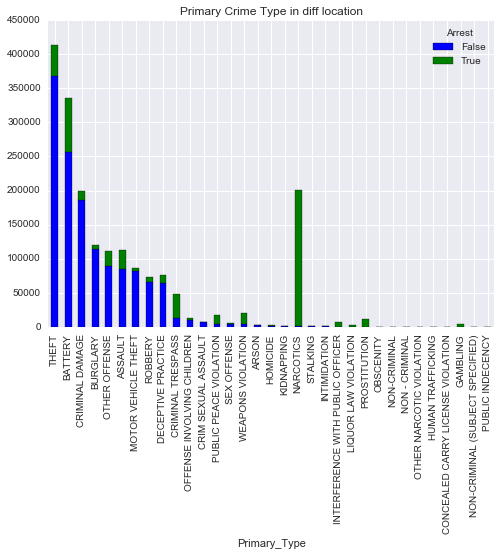

In [37]:
plt.figure()
crime_primary.plot(kind='bar',stacked=True,title="Crime Type's arrest frequency ")

But the questions is there are too much columns of crime type.
We try to pick up top six, and sum others to the one column "Other".

In [151]:
# For already arrest
crime_ptsort = pd.DataFrame(crimes)
crime_ptsort = crime_ptsort[crime_ptsort.Arrest != False]
crime_ptsort = crime_ptsort[crime_ptsort.Primary_Type.isin(['THEFT','BATTERY','NARCOTICS','CRIMINAL DAMAGE','BURGLARY','ASSAULT'])]
crime_ptsort = crime_ptsort.groupby('Primary_Type')
crimeType = crime_ptsort.agg({'Case_Number': 'count'})

# Calculate otherType, add inside the crimeType
crime_onlypt = pd.DataFrame(crimes)
crime_onlypt = crime_onlypt[crime_onlypt.Arrest != False]
crime_onlypt = crime_onlypt.groupby('Primary_Type')
crime_only = crime_onlypt.agg({'Case_Number': 'count'})
otherType = crime_only.Case_Number.sum()-crime_only.Case_Number.get_value('THEFT')-crime_only.Case_Number.get_value('NARCOTICS')-crime_only.Case_Number.get_value('BATTERY')-crime_only.Case_Number.get_value('CRIMINAL DAMAGE')-crime_only.Case_Number.get_value('BURGLARY')-crime_only.Case_Number.get_value('ASSAULT')
# Put other type into frame 'crimeType'
crimeType.loc[len(crimeType)+1]=[otherType]
crimeType.rename(index={7:'OTHER TYPE'},inplace=True)
crimeType.sort_values(by='Case_Number', ascending = False) 
crimeType

,Case_Number
Primary_Type,
ASSAULT,27936
BATTERY,78058
BURGLARY,6400
CRIMINAL DAMAGE,13649
NARCOTICS,200132
THEFT,46115
OTHER TYPE,144192


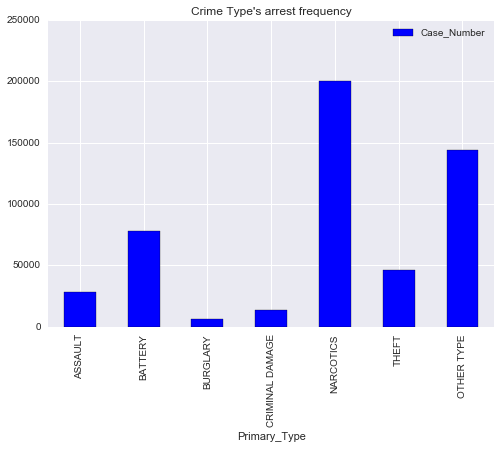

In [150]:
plt.figure()
crimeType.plot(kind='bar',stacked=True,title="Crime Type's arrest frequency")

In [152]:
#For not arrest
crime_ptsort = pd.DataFrame(crimes)
crime_ptsort = crime_ptsort[crime_ptsort.Arrest != True]
crime_ptsort = crime_ptsort[crime_ptsort.Primary_Type.isin(['THEFT','BATTERY','NARCOTICS','CRIMINAL DAMAGE','BURGLARY','ASSAULT'])]
crime_ptsort = crime_ptsort.groupby('Primary_Type')
crimeType = crime_ptsort.agg({'Case_Number': 'count'})

# Calculate otherType, add inside the crimeType
crime_onlypt = pd.DataFrame(crimes)
crime_onlypt = crime_onlypt[crime_onlypt.Arrest != True]
crime_onlypt = crime_onlypt.groupby('Primary_Type')
crime_only = crime_onlypt.agg({'Case_Number': 'count'})
otherType = crime_only.Case_Number.sum()-crime_only.Case_Number.get_value('THEFT')-crime_only.Case_Number.get_value('NARCOTICS')-crime_only.Case_Number.get_value('BATTERY')-crime_only.Case_Number.get_value('CRIMINAL DAMAGE')-crime_only.Case_Number.get_value('BURGLARY')-crime_only.Case_Number.get_value('ASSAULT')
# Put other type into frame 'crimeType'
crimeType.loc[len(crimeType)+1]=[otherType]
crimeType.rename(index={7:'OTHER TYPE'},inplace=True)
crimeType.sort_values(by='Case_Number', ascending = False) 
crimeType

,Case_Number
Primary_Type,
ASSAULT,85129
BATTERY,257095
BURGLARY,114247
CRIMINAL DAMAGE,186385
NARCOTICS,1177
THEFT,367428
OTHER TYPE,352003


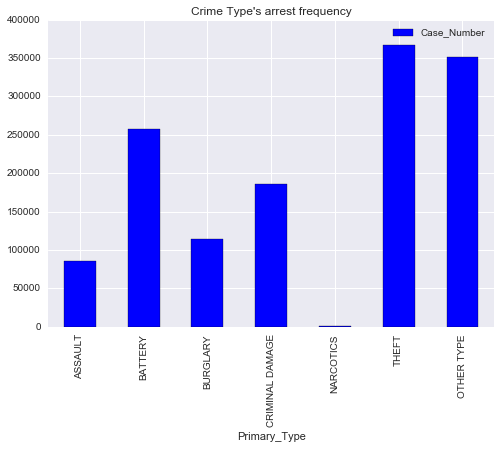

In [153]:
plt.figure()
crimeType.plot(kind='bar',stacked=True,title="Crime Type's arrest frequency")

**2-3-2 Show the arrtest frency with each primary type by year **
(Bound by top six types)

For the crimals are not arrest:

In [176]:
crime_PD = pd.DataFrame(crimes)
crime_PD = crime_PD[crime_PD.Arrest != True]
crime_PD = crime_PD[crime_PD.Primary_Type.isin(['THEFT','BATTERY','NARCOTICS','CRIMINAL DAMAGE','BURGLARY','ASSAULT'])]
crime_PD = crime_PD.groupby(['Year','Primary_Type'])['Case_Number'].count().unstack()
crime_PD

Primary_Type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,NARCOTICS,THEFT
Year,,,,,,
2010,16427,50942,24935,37860,97,68665
2011,15210,46297,25332,34716,57,66384
2012,15101,46067,21562,33386,381,66813
2013,13472,40966,16745,28685,487,63419
2014,12195,36271,13473,25412,147,53396
2015,12724,36552,12200,26326,8,48751


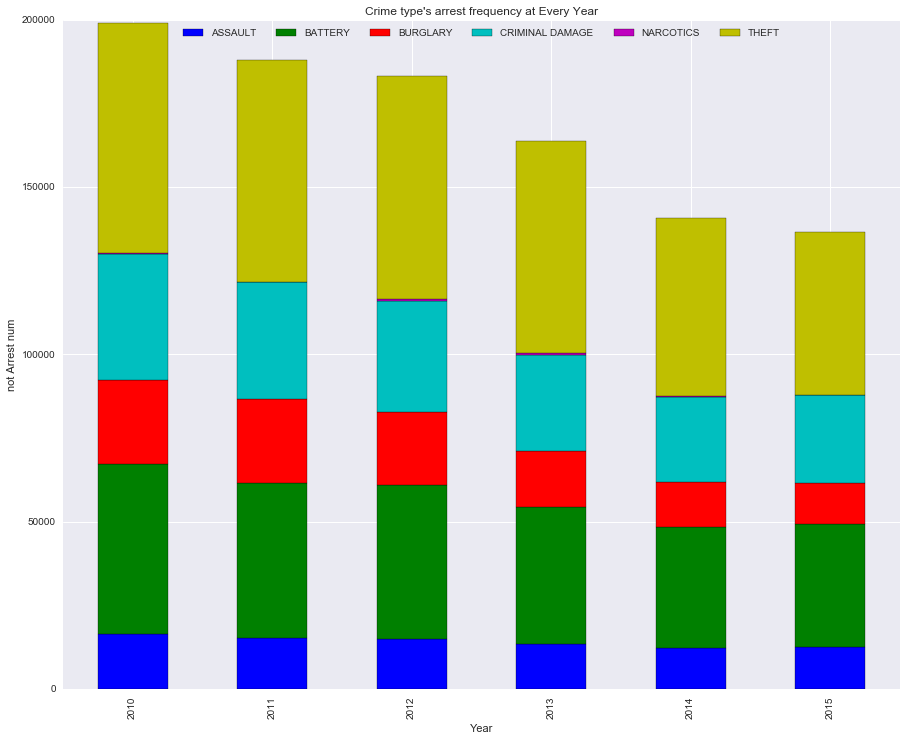

In [142]:
my_plot = crime_PD.plot(kind='bar',stacked=True,title="Crime type's arrest frequency at Every Year",figsize=(15, 12))
my_plot.set_xlabel("Year")
my_plot.set_ylabel("not Arrest num")
my_plot.legend(loc=9,ncol=7)

For the crimals are arrested:

In [147]:
crime_PD_T = pd.DataFrame(crimes)
crime_PD_T = crime_PD_T[crime_PD_T.Arrest == True]
crime_PD_T = crime_PD_T[crime_PD_T.Primary_Type.isin(['THEFT','BATTERY','NARCOTICS','CRIMINAL DAMAGE','BURGLARY','ASSAULT'])]
crime_PD_T = crime_PD_T.groupby(['Year','Primary_Type'])['Case_Number'].count().unstack()
crime_PD_T

Primary_Type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,NARCOTICS,THEFT
Year,,,,,,
2010,5027,14219,1373,2632,43175,7788
2011,5181,14126,1260,2583,38502,8445
2012,4789,13055,1273,2462,35084,8240
2013,4455,12907,1081,2102,33615,7713
2014,4484,12444,851,2067,28713,7335
2015,4000,11307,562,1803,21043,6594


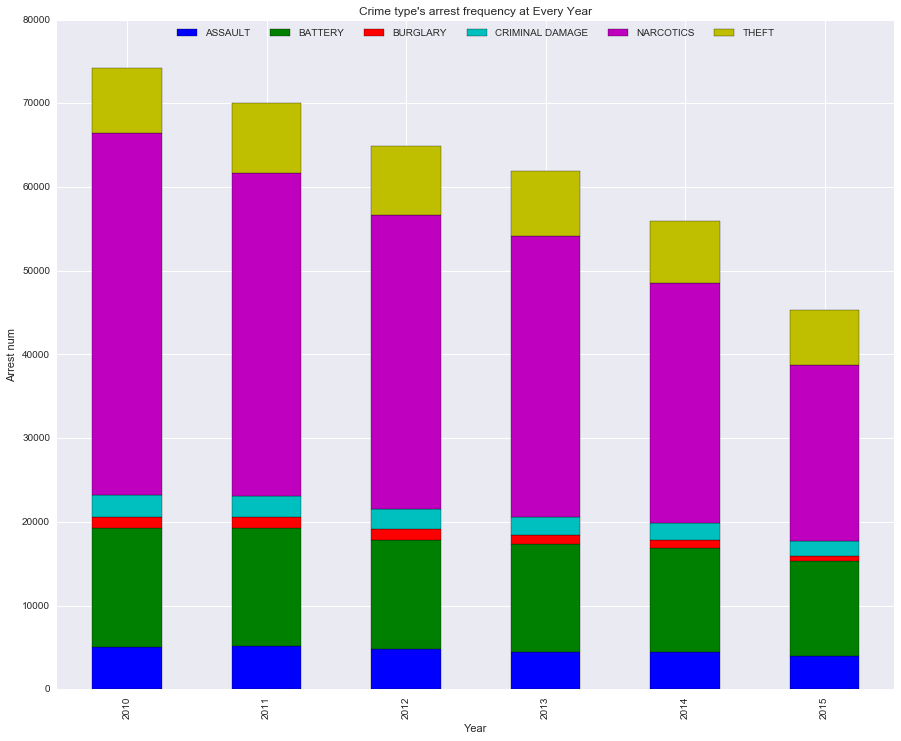

In [148]:
my_plot_T = crime_PD_T.plot(kind='bar',stacked=True,title="Crime type's arrest frequency at Every Year",figsize=(15, 12))
my_plot_T.set_xlabel("Year")
my_plot_T.set_ylabel("Arrest num")
my_plot_T.legend(loc=9,ncol=7)

# 3 Correlations between attributes

# 4 Cluster similar items